In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
import os

In [95]:
# Path to your .shp file
shp_file_path = '../data/taxi_zones/taxi_zones.shp'

# Read the shapefile
zone_shp = gpd.read_file(shp_file_path)

cleaned_data = '../data/cleaned_data.csv'

data = pd.read_csv(cleaned_data)

zone_lookup_path = '../data/taxi_zone_lookup.csv'

zone_lookup = pd.read_csv(zone_lookup_path)

print(zone_shp.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  


In [96]:
print(zone_lookup.head())

   LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone


In [97]:
print(data.head())

  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2024-01-01 00:57:55   2024-01-01 01:17:43              1.0           1.72   
1  2024-01-01 00:03:00   2024-01-01 00:09:36              1.0           1.80   
2  2024-01-01 00:17:06   2024-01-01 00:35:01              1.0           4.70   
3  2024-01-01 00:36:38   2024-01-01 00:44:56              1.0           1.40   
4  2024-01-01 00:46:51   2024-01-01 00:52:57              1.0           0.80   

   RatecodeID  PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0         1.0           186            79             2         17.7    1.0   
1         1.0           140           236             1         10.0    3.5   
2         1.0           236            79             1         23.3    3.5   
3         1.0            79           211             1         10.0    3.5   
4         1.0           211           148             1          7.9    3.5   

   ...  pickup_month  pickup_day  pickup_wee

In [98]:
# Assuming the LocationID is consistent across datasets
merged_df = pd.merge(data, zone_shp[['LocationID', 'geometry']], left_on='PULocationID', right_on='LocationID', how='left')

In [99]:
# Group by the geometry column and sum up the pickups for each zone
pickup_counts = merged_df.groupby('geometry').size().reset_index(name='pickup_count')

In [100]:
gdf = gpd.GeoDataFrame(pickup_counts)

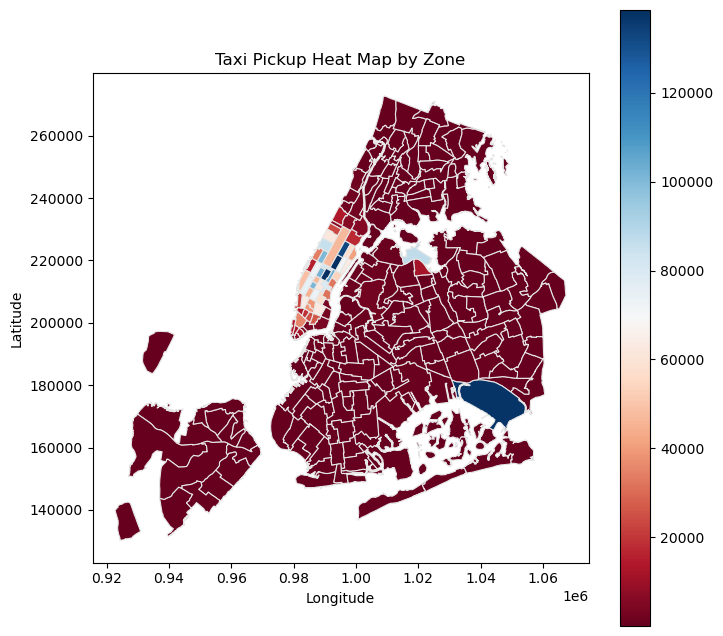

In [101]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
gdf.plot(column='pickup_count', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.9', legend=True)

# Set plot titles and axis labels
plt.title('Taxi Pickup Heat Map by Zone')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

Doing the same for dropoff locations

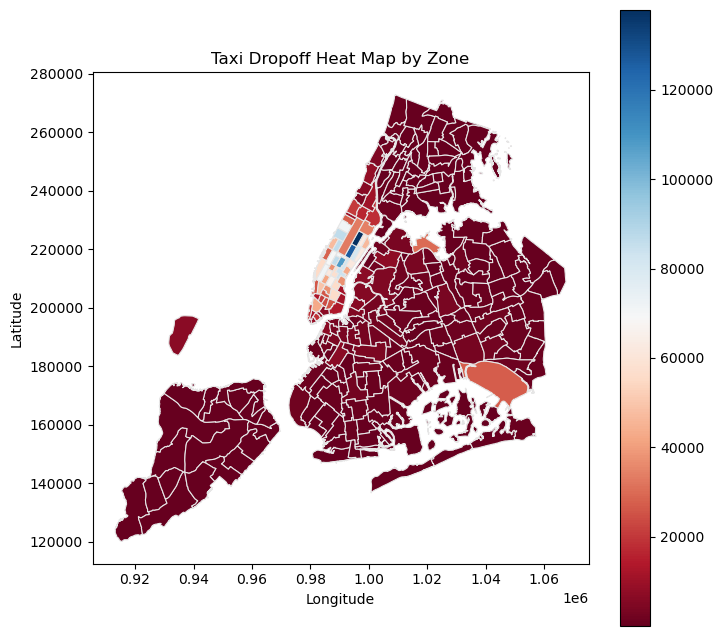

In [102]:
# Assuming the LocationID is consistent across datasets
merged_drop = pd.merge(data, zone_shp[['LocationID', 'geometry']], left_on='DOLocationID', right_on='LocationID', how='left')

# Group by the geometry column and sum up the pickups for each zone
dropoff_counts = merged_drop.groupby('geometry').size().reset_index(name='dropoff_count')

dropoff_gdf = gpd.GeoDataFrame(dropoff_counts)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dropoff_gdf.plot(column='dropoff_count', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.9', legend=True)

# Set plot titles and axis labels
plt.title('Taxi Dropoff Heat Map by Zone')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

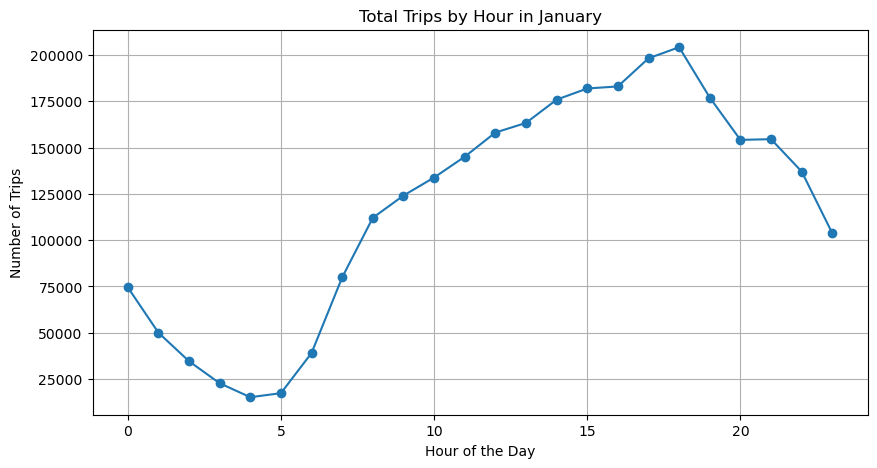

Max trips: 204161 at hour 18
Min trips: 15153 at hour 4


In [103]:
# Filter for January (assuming pickup_month represents the month)
df_january = data[data['pickup_month'] == 1]

# Count total trips by hour
trips_by_hour = df_january.groupby('pickup_hour').size()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(trips_by_hour.index, trips_by_hour.values, marker='o')
plt.title('Total Trips by Hour in January')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

# Print max and min number of trips and their corresponding hours
max_trips = trips_by_hour.max()
min_trips = trips_by_hour.min()
max_hour = trips_by_hour.idxmax()
min_hour = trips_by_hour.idxmin()

print(f"Max trips: {max_trips} at hour {max_hour}")
print(f"Min trips: {min_trips} at hour {min_hour}")

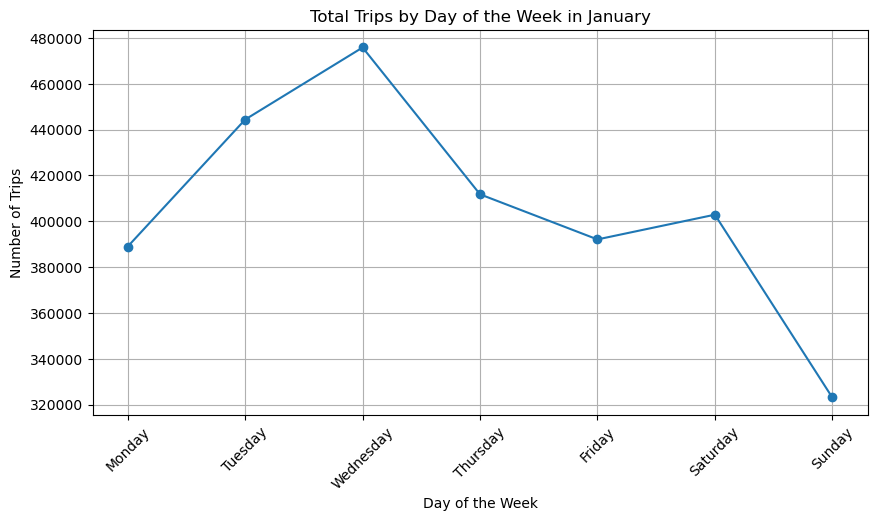

In [104]:
# Create a dictionary to map numbers to weekday names
days_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Count total trips by day of the week
trips_by_day = df_january.groupby('pickup_weekday').size()

# Replace numeric days with weekday names
trips_by_day.index = trips_by_day.index.map(days_of_week)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(trips_by_day.index, trips_by_day.values, marker='o')
plt.title('Total Trips by Day of the Week in January')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

# # Count total trips by hour
# trips_by_day = df_january.groupby('pickup_day').size()

# # Plotting
# plt.figure(figsize=(10, 5))
# plt.plot(trips_by_day.index, trips_by_day.values, marker='o')
# plt.title('Total Trips by Hour in January')
# plt.xlabel('Day of the month')
# plt.ylabel('Number of Trips')
# plt.grid(True)
# plt.show()

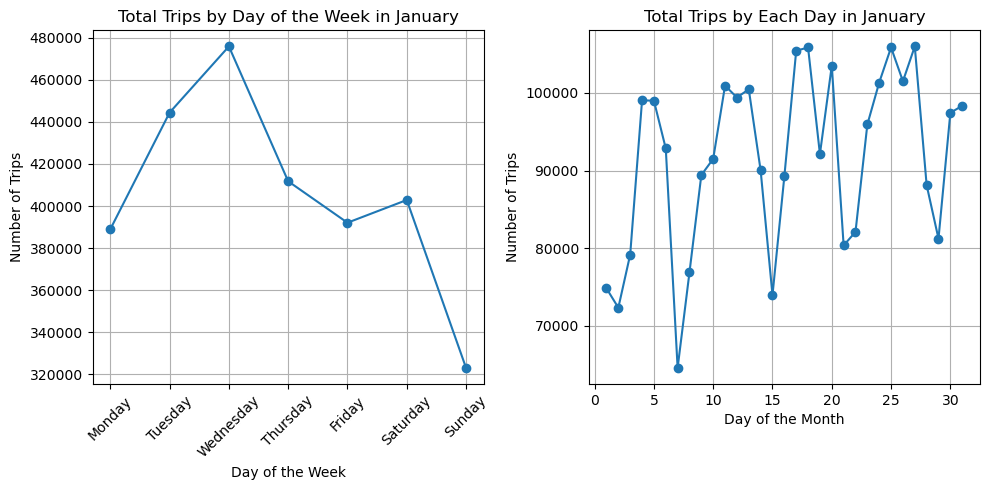

In [105]:
# Count total trips by day of the week
trips_by_day_of_week = df_january.groupby('pickup_weekday').size()

# Replace numeric days with weekday names
trips_by_day_of_week.index = trips_by_day_of_week.index.map(days_of_week)

# Count total trips by each specific date
trips_by_date = df_january.groupby('pickup_day').size()

# Plot 1: Total trips by day of the week
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # First subplot in a 1x2 grid
plt.plot(trips_by_day_of_week.index, trips_by_day_of_week.values, marker='o')
plt.title('Total Trips by Day of the Week in January')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.xticks(rotation=45)

# Plot 2: Total trips by each specific day in January
plt.subplot(1, 2, 2)  # Second subplot in a 1x2 grid
plt.plot(trips_by_date.index, trips_by_date.values, marker='o')
plt.title('Total Trips by Each Day in January')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Trips')
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

/var/folders/lq/32167fz10179drz_rw4nmmy40000gn/T/ipykernel_13370/169272401.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_january['pickup_weekday_name'] = df_january['pickup_weekday'].map(days_of_week)


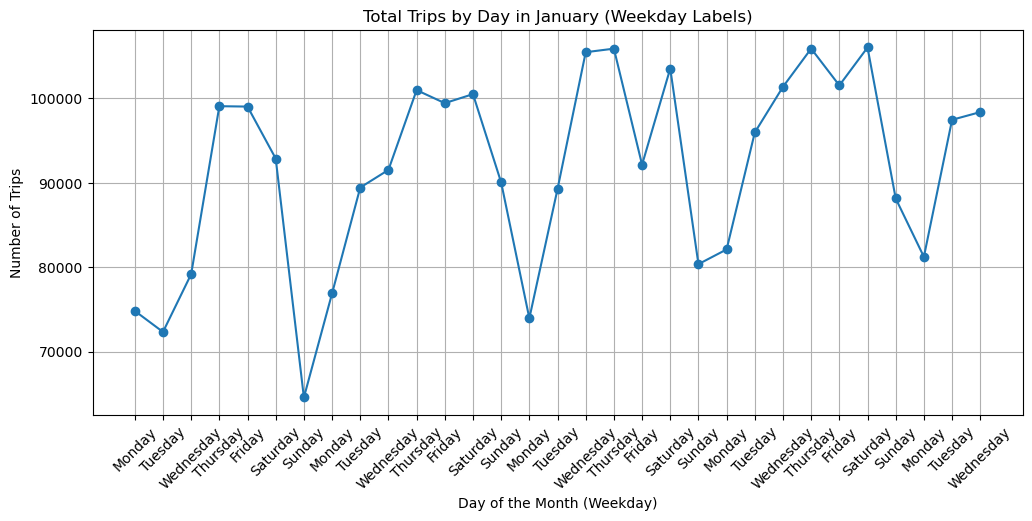

In [106]:
# Create a dictionary to map numbers to weekday names
days_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Filter for January (assuming pickup_month represents the month)
df_january = data[data['pickup_month'] == 1]

# Count total trips by each specific day of the month
trips_by_day_of_month = df_january.groupby('pickup_day').size()

# Map the day of the month to the corresponding weekday
df_january['pickup_weekday_name'] = df_january['pickup_weekday'].map(days_of_week)

# Create a list of weekday names corresponding to the day of the month
weekday_labels = df_january.drop_duplicates('pickup_day').sort_values('pickup_day')['pickup_weekday_name'].values

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(trips_by_day_of_month.index, trips_by_day_of_month.values, marker='o')
plt.title('Total Trips by Day in January (Weekday Labels)')
plt.xlabel('Day of the Month (Weekday)')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.xticks(trips_by_day_of_month.index, weekday_labels, rotation=45)  # Show weekdays instead of numeric dates
plt.show()

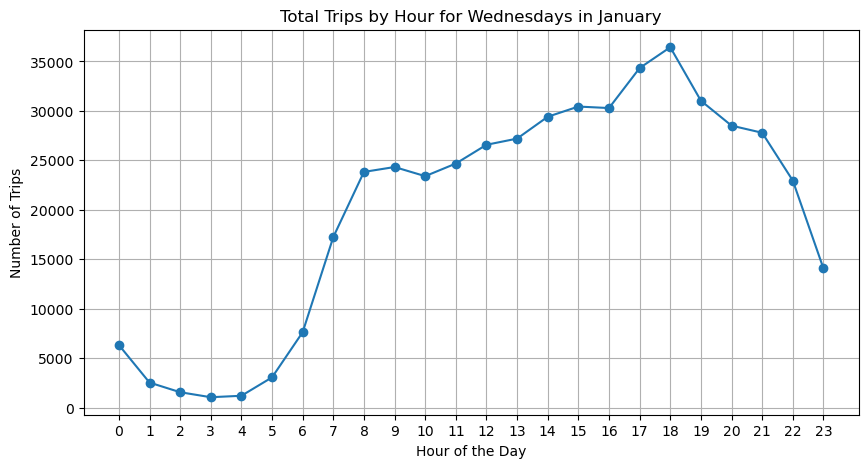

In [107]:
# Filter for only Wednesdays (where pickup_weekday == 2, as 2 corresponds to Wednesday)
df_wednesdays = df_january[df_january['pickup_weekday'] == 2]

# Count total trips by hour for all Wednesdays
trips_by_hour_wednesday = df_wednesdays.groupby('pickup_hour').size()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(trips_by_hour_wednesday.index, trips_by_hour_wednesday.values, marker='o')
plt.title('Total Trips by Hour for Wednesdays in January')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.xticks(range(24))  # Ensure that all 24 hours are represented on the x-axis
plt.show()

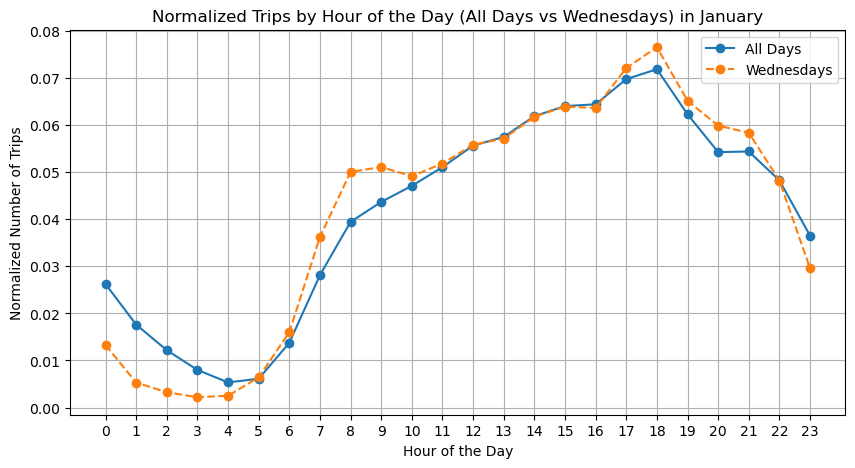

In [108]:
# Count total trips by hour for all days in January
trips_by_hour_all = df_january.groupby('pickup_hour').size()

# Count total trips by hour for Wednesdays in January
trips_by_hour_wednesday = df_wednesdays.groupby('pickup_hour').size()

# Normalize the counts (by dividing by the total number of trips in each group)
trips_by_hour_all_normalized = trips_by_hour_all / trips_by_hour_all.sum()
trips_by_hour_wednesday_normalized = trips_by_hour_wednesday / trips_by_hour_wednesday.sum()

# Plotting
plt.figure(figsize=(10, 5))

# Plot normalized trips for all days in January
plt.plot(trips_by_hour_all_normalized.index, trips_by_hour_all_normalized.values, marker='o', label='All Days')

# Plot normalized trips for Wednesdays in January
plt.plot(trips_by_hour_wednesday_normalized.index, trips_by_hour_wednesday_normalized.values, marker='o', label='Wednesdays', linestyle='--')

# Adding title and labels
plt.title('Normalized Trips by Hour of the Day (All Days vs Wednesdays) in January')
plt.xlabel('Hour of the Day')
plt.ylabel('Normalized Number of Trips')
plt.grid(True)
plt.xticks(range(24))  # Ensure that all 24 hours are represented on the x-axis
plt.legend()

# Show plot
plt.show()

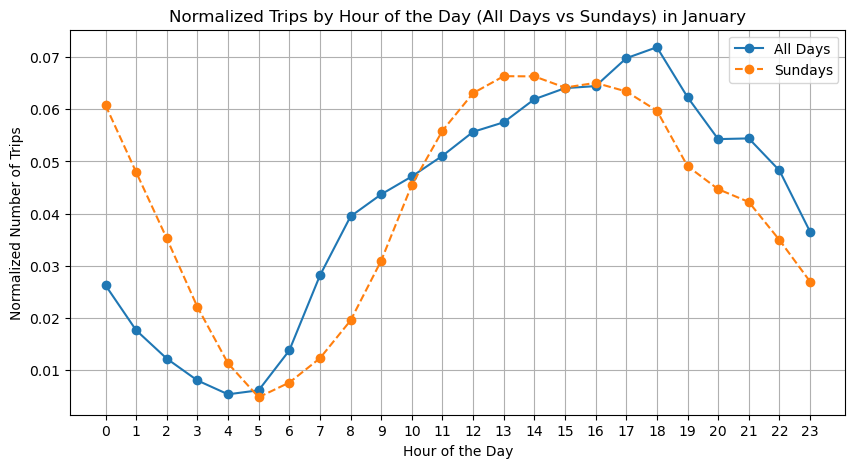

In [109]:
# Filter for only Wednesdays (where pickup_weekday == 2, as 2 corresponds to Wednesday)
df_sundays = df_january[df_january['pickup_weekday'] == 6]

# Count total trips by hour for all days in January
trips_by_hour_all = df_january.groupby('pickup_hour').size()

# Count total trips by hour for Wednesdays in January
trips_by_hour_sunday = df_sundays.groupby('pickup_hour').size()

# Normalize the counts (by dividing by the total number of trips in each group)
trips_by_hour_all_normalized = trips_by_hour_all / trips_by_hour_all.sum()
trips_by_hour_sunday_normalized = trips_by_hour_sunday / trips_by_hour_sunday.sum()

# Plotting
plt.figure(figsize=(10, 5))

# Plot normalized trips for all days in January
plt.plot(trips_by_hour_all_normalized.index, trips_by_hour_all_normalized.values, marker='o', label='All Days')

# Plot normalized trips for Wednesdays in January
plt.plot(trips_by_hour_sunday_normalized.index, trips_by_hour_sunday_normalized.values, marker='o', label='Sundays', linestyle='--')

# Adding title and labels
plt.title('Normalized Trips by Hour of the Day (All Days vs Sundays) in January')
plt.xlabel('Hour of the Day')
plt.ylabel('Normalized Number of Trips')
plt.grid(True)
plt.xticks(range(24))  # Ensure that all 24 hours are represented on the x-axis
plt.legend()

# Show plot
plt.show()

In [23]:
from scipy.stats import ks_2samp

# Perform Kolmogorov-Smirnov test
ks_stat, p_value = ks_2samp(trips_by_hour_all_normalized, trips_by_hour_wednesday_normalized)

print(f"KS Statistic: {ks_stat}")
print(f"P-value: {p_value}")

KS Statistic: 0.16666666666666666
P-value: 0.9024001944012529


In [24]:
from scipy.stats import chisquare

# Chi-Square Test (Wednesdays as observed, All days as expected)
chi2_stat, p_value = chisquare(trips_by_hour_wednesday_normalized, f_exp=trips_by_hour_all_normalized)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi-Square Statistic: 0.03687360335551819
P-value: 1.0


In [25]:
from scipy.stats import pearsonr, spearmanr

# Pearson Correlation
pearson_corr, _ = pearsonr(trips_by_hour_all_normalized, trips_by_hour_wednesday_normalized)
print(f"Pearson Correlation: {pearson_corr}")

# Spearman Correlation
spearman_corr, _ = spearmanr(trips_by_hour_all_normalized, trips_by_hour_wednesday_normalized)
print(f"Spearman Correlation: {spearman_corr}")

Pearson Correlation: 0.976378039977748
Spearman Correlation: 0.9695652173913042


In [26]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(trips_by_hour_all_normalized, trips_by_hour_wednesday_normalized)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.406680710692507e-05


In [27]:
from scipy.stats import wasserstein_distance

# Calculate Wasserstein Distance
emd = wasserstein_distance(trips_by_hour_all_normalized, trips_by_hour_wednesday_normalized)
print(f"Earth Mover's Distance: {emd}")

Earth Mover's Distance: 0.003439436918346707


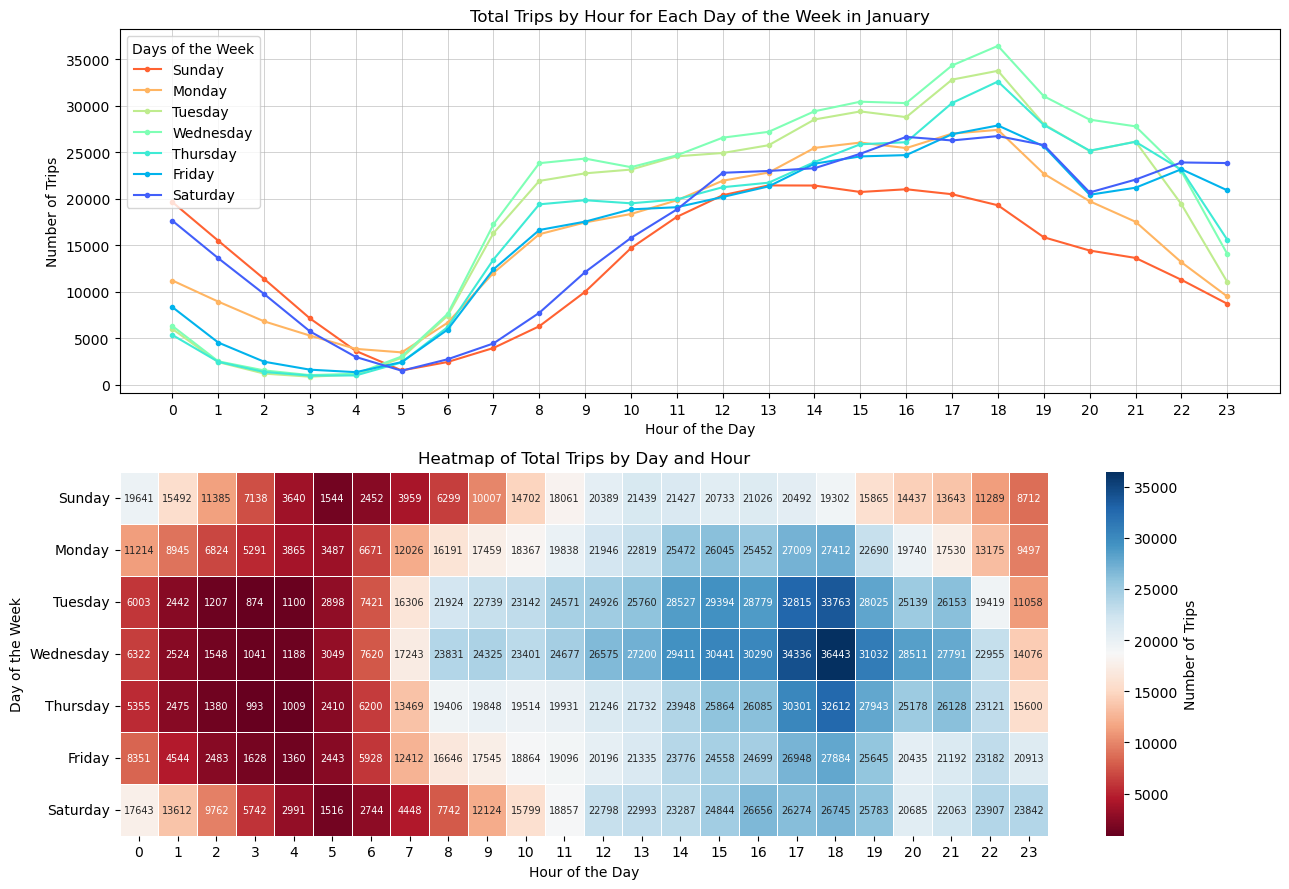

In [110]:
df_mondays = df_january[df_january['pickup_weekday'] == 0]
df_tuesdays = df_january[df_january['pickup_weekday'] == 1]
df_wednesdays = df_january[df_january['pickup_weekday'] == 2]
df_thursdays = df_january[df_january['pickup_weekday'] == 3]
df_fridays = df_january[df_january['pickup_weekday'] == 4]
df_saturdays = df_january[df_january['pickup_weekday'] == 5]
df_sundays = df_january[df_january['pickup_weekday'] == 6]

# Count total trips by hour for each day of the week
trips_by_hour_sunday = df_sundays.groupby('pickup_hour').size()
trips_by_hour_monday = df_mondays.groupby('pickup_hour').size()
trips_by_hour_tuesday = df_tuesdays.groupby('pickup_hour').size()
trips_by_hour_wednesday = df_wednesdays.groupby('pickup_hour').size()
trips_by_hour_thursday = df_thursdays.groupby('pickup_hour').size()
trips_by_hour_friday = df_fridays.groupby('pickup_hour').size()
trips_by_hour_saturday = df_saturdays.groupby('pickup_hour').size()

# Set a color palette from seaborn
colors = sns.color_palette("rainbow_r", 7)  # "tab10" provides 10 vibrant colors, using the first 7 for each day

# Create a figure with equal-sized subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 9), gridspec_kw={'height_ratios': [1, 1]})

# First subplot: Line plot for each day with specified colors
ax1.plot(trips_by_hour_sunday.index, trips_by_hour_sunday.values, marker='.', label='Sunday', color=colors[0])
ax1.plot(trips_by_hour_monday.index, trips_by_hour_monday.values, marker='.', label='Monday', color=colors[1])
ax1.plot(trips_by_hour_tuesday.index, trips_by_hour_tuesday.values, marker='.', label='Tuesday', color=colors[2])
ax1.plot(trips_by_hour_wednesday.index, trips_by_hour_wednesday.values, marker='.', label='Wednesday', color=colors[3])
ax1.plot(trips_by_hour_thursday.index, trips_by_hour_thursday.values, marker='.', label='Thursday', color=colors[4])
ax1.plot(trips_by_hour_friday.index, trips_by_hour_friday.values, marker='.', label='Friday', color=colors[5])
ax1.plot(trips_by_hour_saturday.index, trips_by_hour_saturday.values, marker='.', label='Saturday', color=colors[6])

ax1.set_title('Total Trips by Hour for Each Day of the Week in January')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Number of Trips')
ax1.grid(True, linewidth=0.4)
ax1.set_xticks(range(24))
ax1.legend(title="Days of the Week")

# Second subplot: Heatmap
# Combine all daily series into a DataFrame
trips_by_day_hour_df = pd.DataFrame({
    'Sunday': trips_by_hour_sunday,
    'Monday': trips_by_hour_monday,
    'Tuesday': trips_by_hour_tuesday,
    'Wednesday': trips_by_hour_wednesday,
    'Thursday': trips_by_hour_thursday,
    'Friday': trips_by_hour_friday,
    'Saturday': trips_by_hour_saturday
}).T.fillna(0)  # Transpose and fill NaNs with 0

# Heatmap with annotations and adjusted font size
sns.heatmap(trips_by_day_hour_df, cmap="RdBu", annot=True, fmt=".0f", cbar_kws={'label': 'Number of Trips'},
            linewidths=0.5, ax=ax2, annot_kws={"size": 7})  # Adjust font size with annot_kws
ax2.set_title('Heatmap of Total Trips by Day and Hour')
ax2.set_xlabel('Hour of the Day')
ax2.set_ylabel('Day of the Week')

# Adjust layout to ensure even sizing and display
plt.tight_layout()
plt.show()

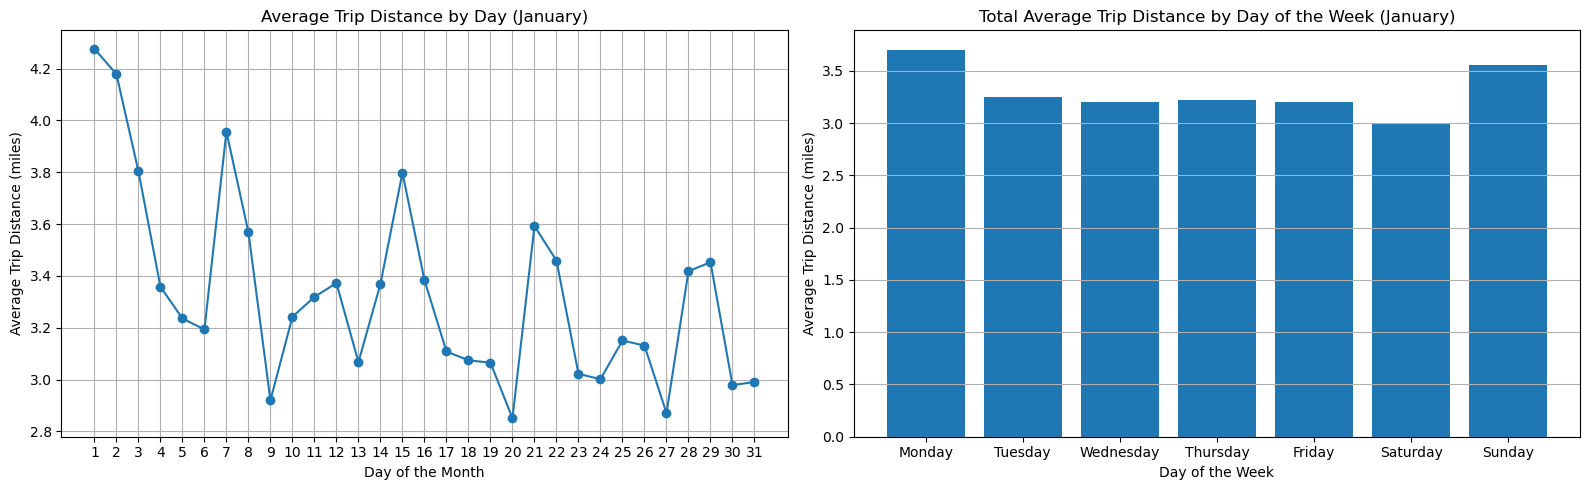

In [111]:
# Calculate average trip distance by day over the course of the month
avg_trip_distance_by_day = df_january.groupby('pickup_day')['trip_distance'].mean()

# Calculate total average trip distance by day of the week
avg_trip_distance_by_weekday = df_january.groupby('pickup_weekday')['trip_distance'].mean()

# Day names for labeling the plots
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Average trip distance by day over the course of the month
ax1.plot(avg_trip_distance_by_day.index, avg_trip_distance_by_day.values, marker='o')
ax1.set_title('Average Trip Distance by Day (January)')
ax1.set_xlabel('Day of the Month')
ax1.set_ylabel('Average Trip Distance (miles)')
ax1.grid(True)
ax1.set_xticks(range(1, 32))  # Assuming January has 31 days

# Plot 2: Total average trip distance by day of the week
ax2.bar(avg_trip_distance_by_weekday.index, avg_trip_distance_by_weekday.values, tick_label=day_names)
ax2.set_title('Total Average Trip Distance by Day of the Week (January)')
ax2.set_xlabel('Day of the Week')
ax2.set_ylabel('Average Trip Distance (miles)')
ax2.grid(axis='y')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

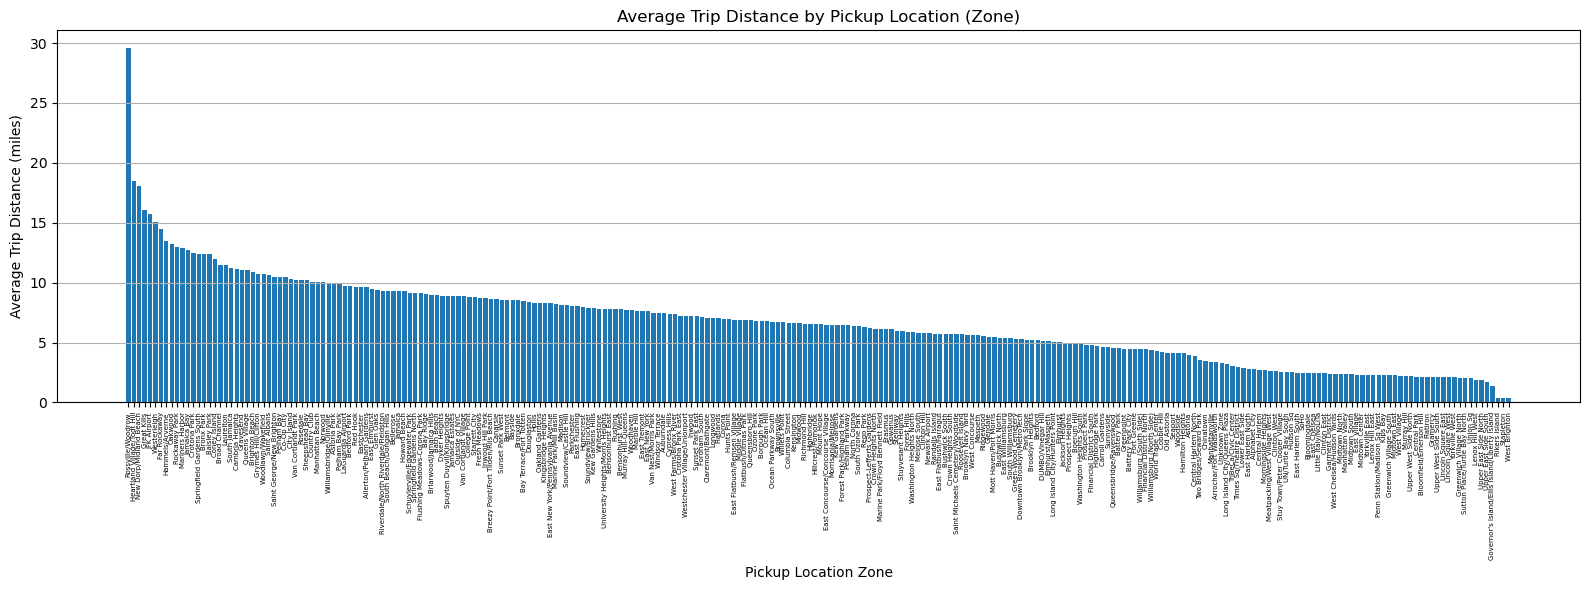

Overall Average Trip Distance: 6.679727418939377 miles


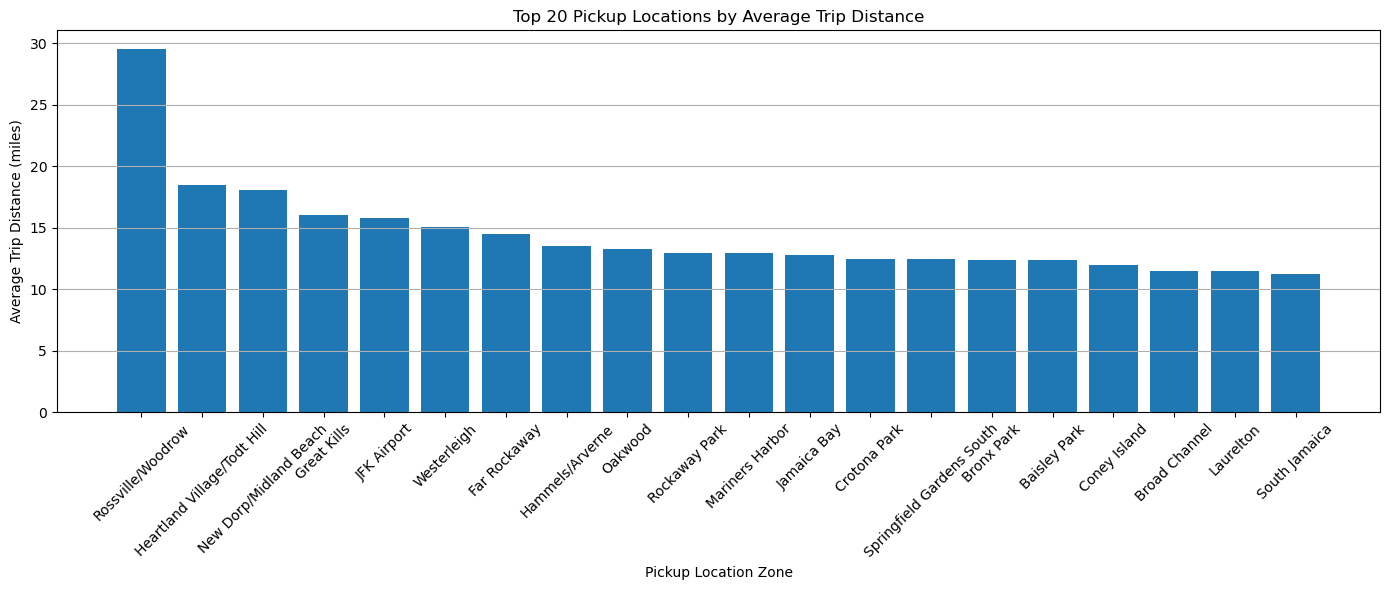

In [117]:
# Calculate the average trip distance for each PULocationID
avg_trip_distance_by_location = df_january.groupby('PULocationID')['trip_distance'].mean().reset_index()

# Merge with zone_lookup to get descriptive labels for each pickup location
avg_trip_distance_with_zone = avg_trip_distance_by_location.merge(
    zone_lookup[['LocationID', 'Zone', 'Borough']], left_on='PULocationID', right_on='LocationID', how='left'
)

# Handle missing Zone values by filling with 'Unknown Zone'
avg_trip_distance_with_zone['Zone'] = avg_trip_distance_with_zone['Zone'].fillna('Unknown Zone')

# Sort by average trip distance for better visualization
avg_trip_distance_with_zone = avg_trip_distance_with_zone.sort_values(by='trip_distance', ascending=False)

# Plot: Bar plot of average trip distance by Pickup Location (Zone)
plt.figure(figsize=(16, 6))
plt.bar(avg_trip_distance_with_zone['Zone'], avg_trip_distance_with_zone['trip_distance'])
plt.title('Average Trip Distance by Pickup Location (Zone)')
plt.xlabel('Pickup Location Zone')
plt.ylabel('Average Trip Distance (miles)')
plt.xticks(rotation=90, fontsize=5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Calculate the average trip distance for each PULocationID
avg_trip_distance_by_location = df_january.groupby('PULocationID')['trip_distance'].mean().reset_index()

# Calculate the overall average of these average distances
overall_average_trip_distance = avg_trip_distance_by_location['trip_distance'].mean()

print("Overall Average Trip Distance:", overall_average_trip_distance, "miles")

# Select top 20 locations by average trip distance
top_20_locations = avg_trip_distance_with_zone.head(20)

# Plot top 20 locations
plt.figure(figsize=(14, 6))
plt.bar(top_20_locations['Zone'], top_20_locations['trip_distance'])
plt.title('Top 20 Pickup Locations by Average Trip Distance')
plt.xlabel('Pickup Location Zone')
plt.ylabel('Average Trip Distance (miles)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

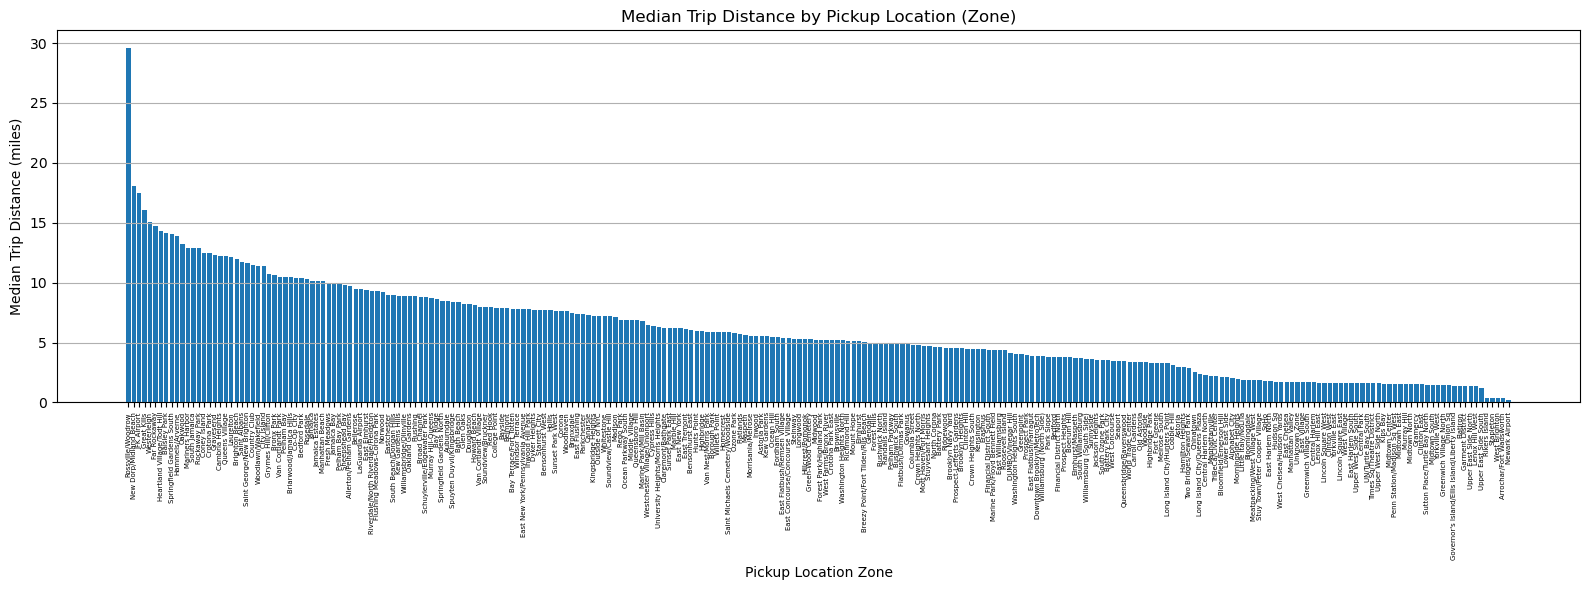

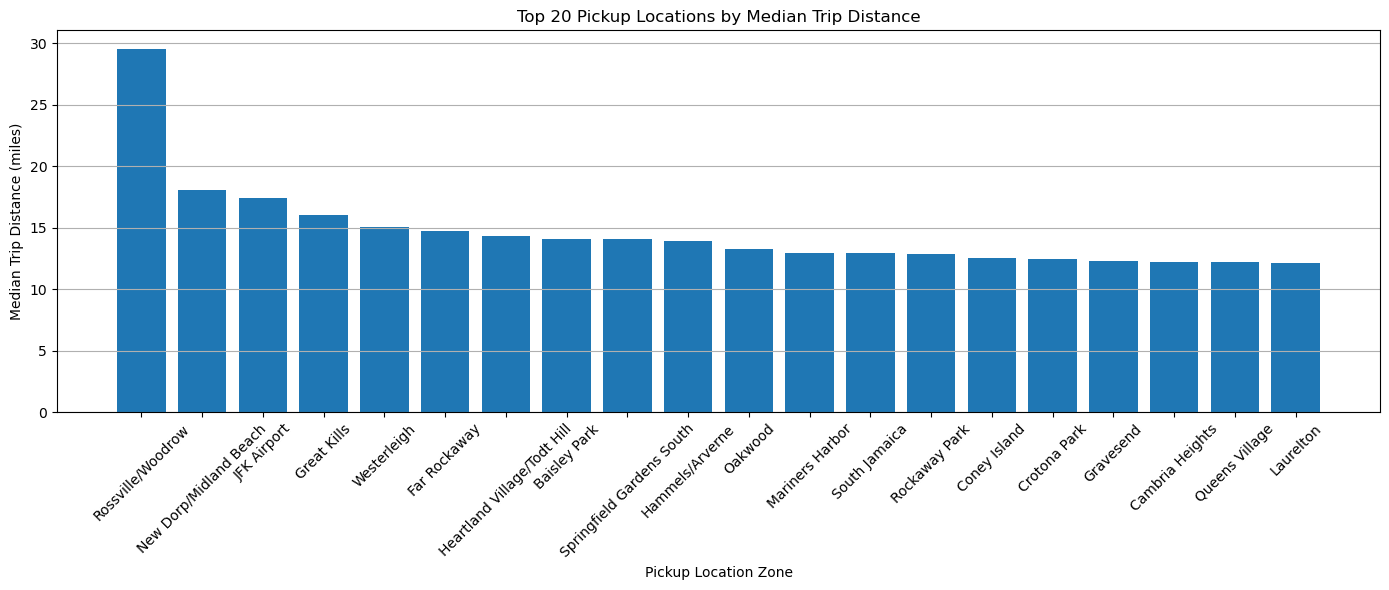

In [118]:
# Calculate the median trip distance for each PULocationID
median_trip_distance_by_location = df_january.groupby('PULocationID')['trip_distance'].median().reset_index()

# Merge with zone_lookup to get descriptive labels for each pickup location
median_trip_distance_with_zone = median_trip_distance_by_location.merge(
    zone_lookup[['LocationID', 'Zone', 'Borough']], left_on='PULocationID', right_on='LocationID', how='left'
)

# Handle missing Zone values by filling with 'Unknown Zone'
median_trip_distance_with_zone['Zone'] = median_trip_distance_with_zone['Zone'].fillna('Unknown Zone')

# Sort by median trip distance for better visualization
median_trip_distance_with_zone = median_trip_distance_with_zone.sort_values(by='trip_distance', ascending=False)

# Plot: Bar plot of median trip distance by Pickup Location (Zone)
plt.figure(figsize=(16, 6))
plt.bar(median_trip_distance_with_zone['Zone'], median_trip_distance_with_zone['trip_distance'])
plt.title('Median Trip Distance by Pickup Location (Zone)')
plt.xlabel('Pickup Location Zone')
plt.ylabel('Median Trip Distance (miles)')
plt.xticks(rotation=90, fontsize=5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Sort by median trip distance and select the top 20 locations
top_20_locations = median_trip_distance_with_zone.sort_values(by='trip_distance', ascending=False).head(20)

# Plot: Bar plot of median trip distance for the top 20 Pickup Locations (Zone)
plt.figure(figsize=(14, 6))
plt.bar(top_20_locations['Zone'], top_20_locations['trip_distance'])
plt.title('Top 20 Pickup Locations by Median Trip Distance')
plt.xlabel('Pickup Location Zone')
plt.ylabel('Median Trip Distance (miles)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

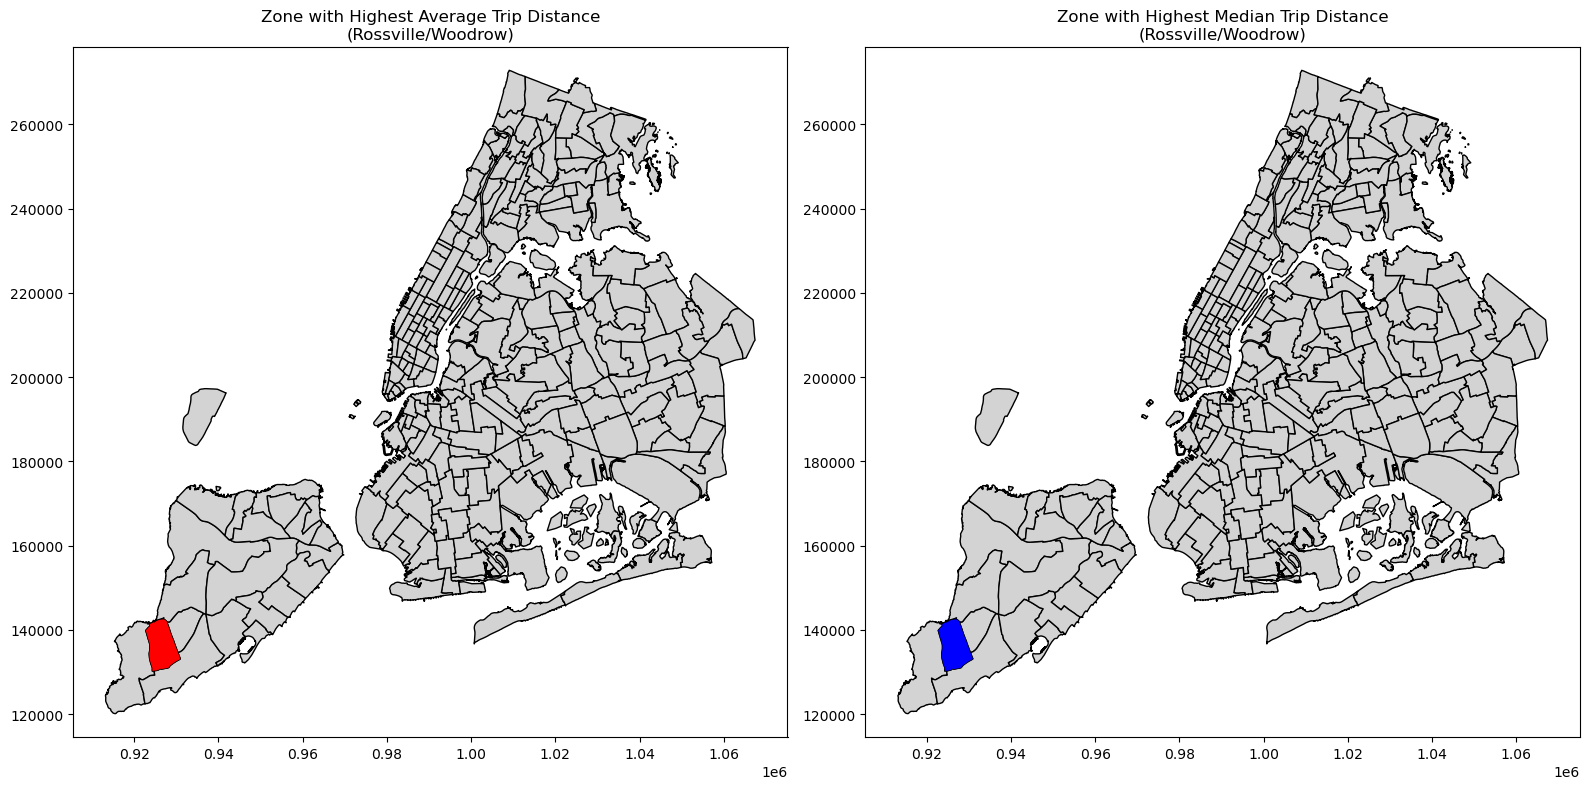

In [ ]:
# Calculate the average and median trip distances for each PULocationID
avg_trip_distance_by_location = df_january.groupby('PULocationID')['trip_distance'].mean().reset_index()
median_trip_distance_by_location = df_january.groupby('PULocationID')['trip_distance'].median().reset_index()

# Merge with zone_lookup to get descriptive labels for each pickup location
avg_trip_distance_with_zone = avg_trip_distance_by_location.merge(
    zone_lookup[['LocationID', 'Zone', 'Borough']], left_on='PULocationID', right_on='LocationID', how='left'
)
median_trip_distance_with_zone = median_trip_distance_by_location.merge(
    zone_lookup[['LocationID', 'Zone', 'Borough']], left_on='PULocationID', right_on='LocationID', how='left'
)

# Assuming "OBJECTID" is the correct column name in zone_shp to match LocationID
# Merge shapefile with average and median data to highlight specific zones
zone_shp = zone_shp.merge(avg_trip_distance_with_zone, left_on='OBJECTID', right_on='PULocationID', how='left')
zone_shp = zone_shp.merge(median_trip_distance_with_zone[['PULocationID', 'trip_distance']], on='PULocationID', suffixes=('_avg', '_median'), how='left')

# Find the zones with the highest average and median trip distances
highest_avg_zone = avg_trip_distance_with_zone.loc[avg_trip_distance_with_zone['trip_distance'].idxmax()]
highest_median_zone = median_trip_distance_with_zone.loc[median_trip_distance_with_zone['trip_distance'].idxmax()]

# Find the zones with the highest average and median trip distances
highest_avg_zone = zone_shp.loc[zone_shp['trip_distance_avg'].idxmax()]
highest_median_zone = zone_shp.loc[zone_shp['trip_distance_median'].idxmax()]

# Create a figure for the two maps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Map: Highlight the zone with the highest average trip distance
zone_shp.plot(color='lightgrey', edgecolor='black', ax=ax1)
highlight_avg_zone = zone_shp[zone_shp['LocationID_x'] == highest_avg_zone['LocationID_x']]
highlight_avg_zone.plot(color='red', ax=ax1)  # Highlight zone in red
ax1.set_title(f"Zone with Highest Average Trip Distance\n({highest_avg_zone['Zone']})")
ax1.axis('equal')  # Maintain aspect ratio

# Map: Highlight the zone with the highest median trip distance
zone_shp.plot(color='lightgrey', edgecolor='black', ax=ax2)
highlight_median_zone = zone_shp[zone_shp['LocationID_x'] == highest_median_zone['LocationID_x']]
highlight_median_zone.plot(color='blue', ax=ax2)  # Highlight zone in blue
ax2.set_title(f"Zone with Highest Median Trip Distance\n({highest_median_zone['Zone']})")
ax2.axis('equal')  # Maintain aspect ratio

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

print()

In [123]:
# Find the LocationID for "Rossville/Woodrow"
rossville_location = zone_lookup[zone_lookup['Zone'] == 'Rossville/Woodrow']

# Print the LocationID
print("LocationID for Rossville/Woodrow:", rossville_location['LocationID'].values[0])


LocationID for Rossville/Woodrow: 204


In [126]:
top_50_trip_distances = df_january.sort_values(by='trip_distance', ascending=False).head(50)

# Print the top 50 entries
print(top_50_trip_distances)

        tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2317091  2024-01-27 14:33:23   2024-01-27 15:43:40              1.0   
1611268  2024-01-19 20:02:22   2024-01-19 21:07:28              2.0   
2170918  2024-01-25 23:07:07   2024-01-26 00:04:02              1.0   
1583567  2024-01-19 15:41:10   2024-01-19 16:44:07              1.0   
1011338  2024-01-13 04:47:10   2024-01-13 05:49:44              1.0   
26350    2024-01-01 09:31:30   2024-01-01 10:26:07              1.0   
2756037  2024-01-10 20:33:34   2024-01-10 21:52:55              NaN   
975341   2024-01-12 19:57:30   2024-01-12 21:02:11              1.0   
1843882  2024-01-22 15:30:40   2024-01-22 17:17:23              1.0   
1846795  2024-01-22 16:27:44   2024-01-22 18:05:33              4.0   
26381    2024-01-01 09:55:46   2024-01-01 10:51:12              1.0   
421583   2024-01-06 08:41:47   2024-01-06 09:35:33              1.0   
113763   2024-01-02 17:10:04   2024-01-02 18:31:53              1.0   
147701

In [131]:
# Filter for entries where PULocationID is 40, sort by trip_distance, and select the top 50
top_50_trip_distances_pulocation_40 = df_january[df_january['PULocationID'] == 132].sort_values(by='trip_distance', ascending=False).head(50)

# Print the top 50 entries
print(top_50_trip_distances_pulocation_40)

        tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1611268  2024-01-19 20:02:22   2024-01-19 21:07:28              2.0   
2170918  2024-01-25 23:07:07   2024-01-26 00:04:02              1.0   
26350    2024-01-01 09:31:30   2024-01-01 10:26:07              1.0   
1843882  2024-01-22 15:30:40   2024-01-22 17:17:23              1.0   
975341   2024-01-12 19:57:30   2024-01-12 21:02:11              1.0   
1846795  2024-01-22 16:27:44   2024-01-22 18:05:33              4.0   
26381    2024-01-01 09:55:46   2024-01-01 10:51:12              1.0   
421583   2024-01-06 08:41:47   2024-01-06 09:35:33              1.0   
113763   2024-01-02 17:10:04   2024-01-02 18:31:53              1.0   
1326915  2024-01-16 20:21:30   2024-01-16 21:20:35              1.0   
1477013  2024-01-18 13:05:54   2024-01-18 14:19:22              1.0   
924736   2024-01-12 10:16:28   2024-01-12 11:26:35              3.0   
2288259  2024-01-27 08:16:14   2024-01-27 09:23:43              1.0   
131056

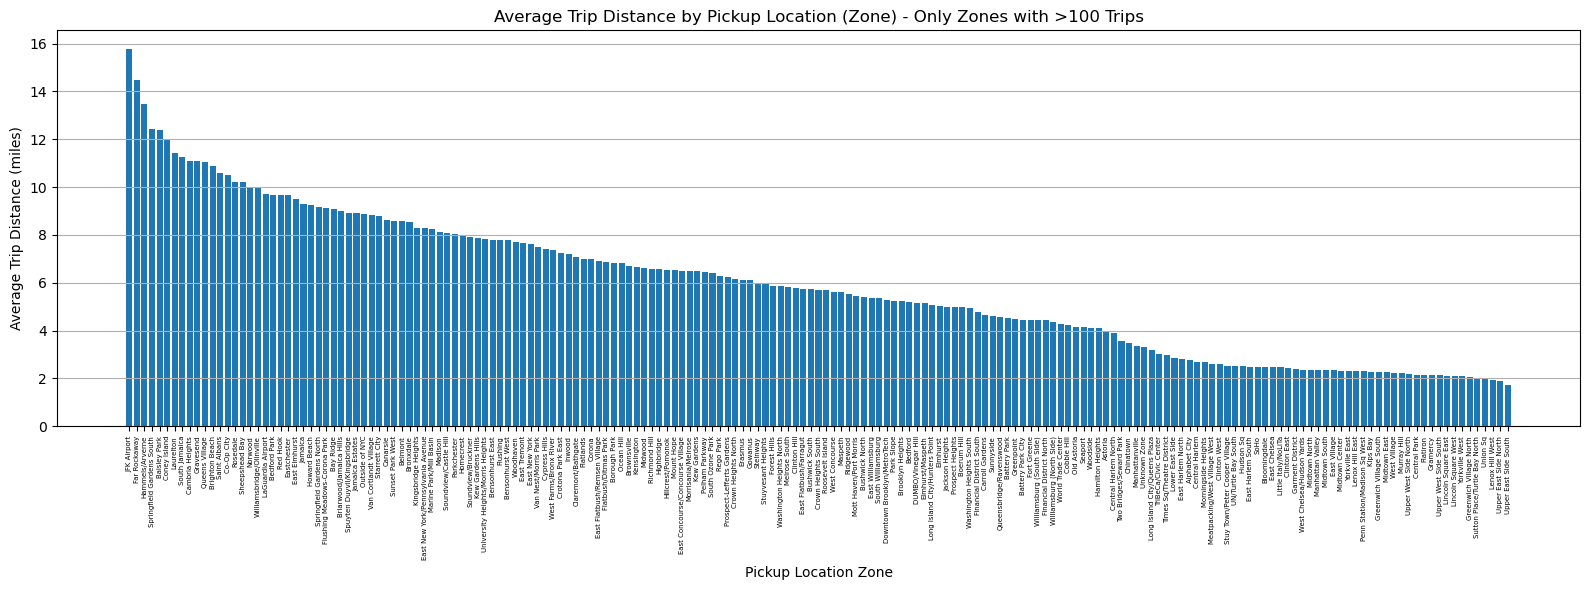

Overall Average Trip Distance for Zones with >100 Trips: 5.903097119193602 miles


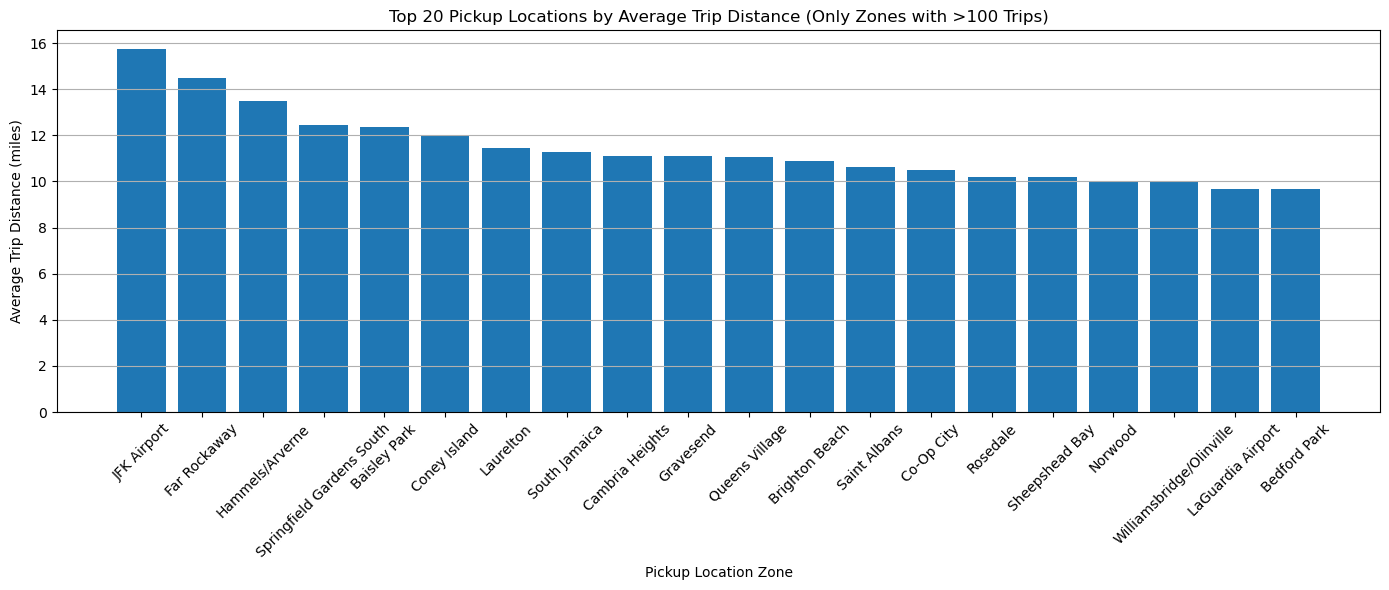

In [132]:
# Calculate the average trip distance for each PULocationID and the count of trips
trip_stats_by_location = df_january.groupby('PULocationID').agg(
    avg_trip_distance=('trip_distance', 'mean'),
    trip_count=('trip_distance', 'size')
).reset_index()

# Filter to include only zones with more than 100 entries
trip_stats_filtered = trip_stats_by_location[trip_stats_by_location['trip_count'] > 100]

# Merge with zone_lookup to get descriptive labels for each pickup location
avg_trip_distance_with_zone = trip_stats_filtered.merge(
    zone_lookup[['LocationID', 'Zone', 'Borough']], left_on='PULocationID', right_on='LocationID', how='left'
)

# Handle missing Zone values by filling with 'Unknown Zone'
avg_trip_distance_with_zone['Zone'] = avg_trip_distance_with_zone['Zone'].fillna('Unknown Zone')

# Sort by average trip distance for better visualization
avg_trip_distance_with_zone = avg_trip_distance_with_zone.sort_values(by='avg_trip_distance', ascending=False)

# Plot: Bar plot of average trip distance by Pickup Location (Zone) for zones with more than 100 trips
plt.figure(figsize=(16, 6))
plt.bar(avg_trip_distance_with_zone['Zone'], avg_trip_distance_with_zone['avg_trip_distance'])
plt.title('Average Trip Distance by Pickup Location (Zone) - Only Zones with >100 Trips')
plt.xlabel('Pickup Location Zone')
plt.ylabel('Average Trip Distance (miles)')
plt.xticks(rotation=90, fontsize=5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Calculate the overall average of these average distances
overall_average_trip_distance = trip_stats_filtered['avg_trip_distance'].mean()

print("Overall Average Trip Distance for Zones with >100 Trips:", overall_average_trip_distance, "miles")

# Select top 20 locations by average trip distance from filtered data
top_20_locations = avg_trip_distance_with_zone.head(20)

# Plot top 20 locations
plt.figure(figsize=(14, 6))
plt.bar(top_20_locations['Zone'], top_20_locations['avg_trip_distance'])
plt.title('Top 20 Pickup Locations by Average Trip Distance (Only Zones with >100 Trips)')
plt.xlabel('Pickup Location Zone')
plt.ylabel('Average Trip Distance (miles)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

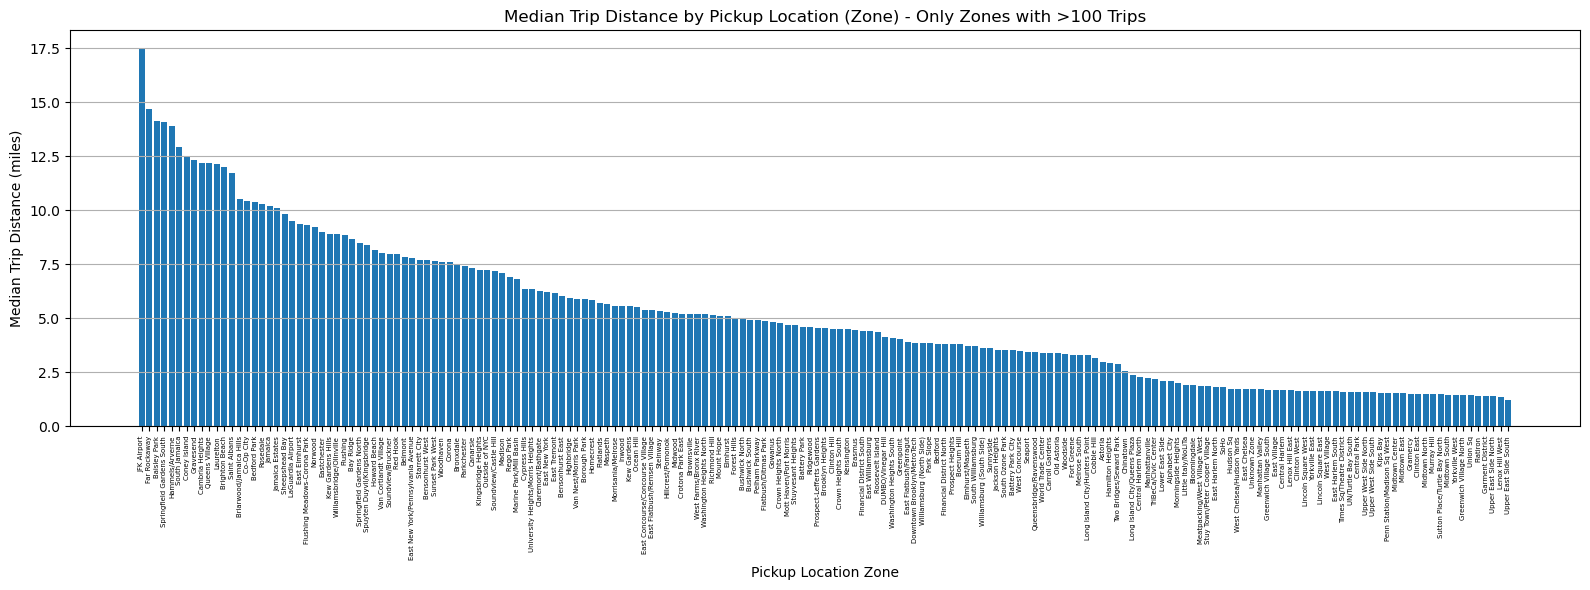

Overall Median Trip Distance for Zones with >100 Trips: 4.53 miles


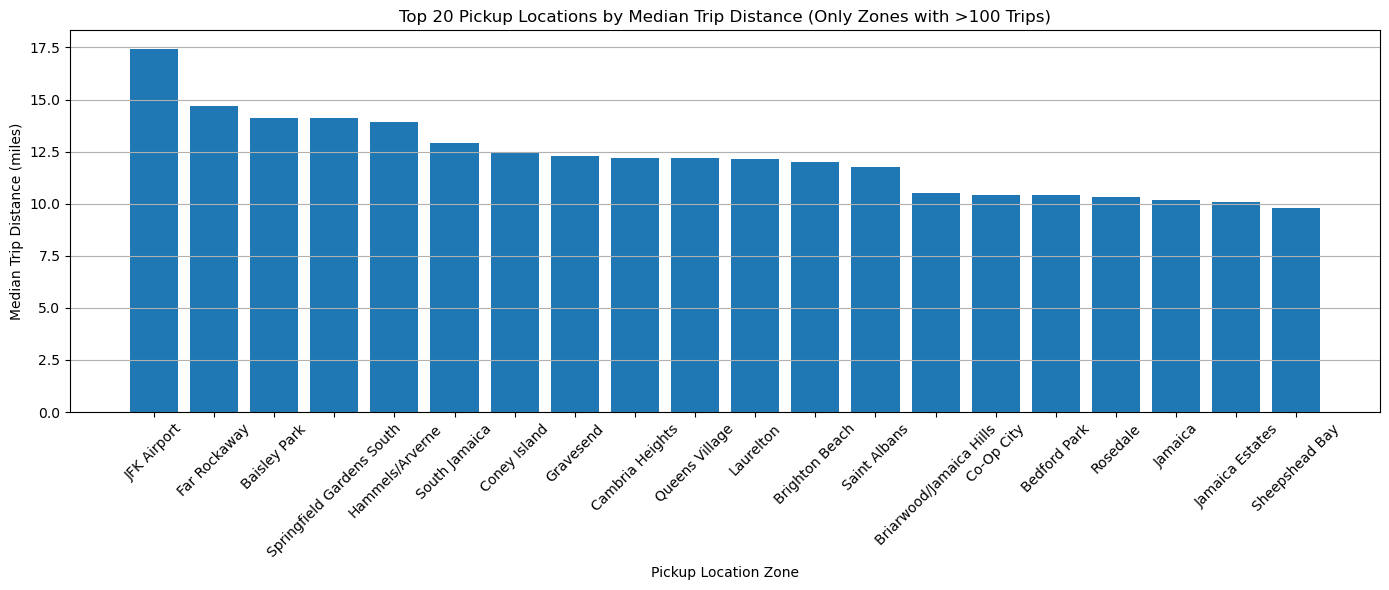

In [133]:
# Calculate the median trip distance and count of trips for each PULocationID
trip_stats_by_location_median = df_january.groupby('PULocationID').agg(
    median_trip_distance=('trip_distance', 'median'),
    trip_count=('trip_distance', 'size')
).reset_index()

# Filter to include only zones with more than 100 entries
trip_stats_filtered_median = trip_stats_by_location_median[trip_stats_by_location_median['trip_count'] > 100]

# Merge with zone_lookup to get descriptive labels for each pickup location
median_trip_distance_with_zone = trip_stats_filtered_median.merge(
    zone_lookup[['LocationID', 'Zone', 'Borough']], left_on='PULocationID', right_on='LocationID', how='left'
)

# Handle missing Zone values by filling with 'Unknown Zone'
median_trip_distance_with_zone['Zone'] = median_trip_distance_with_zone['Zone'].fillna('Unknown Zone')

# Sort by median trip distance for better visualization
median_trip_distance_with_zone = median_trip_distance_with_zone.sort_values(by='median_trip_distance', ascending=False)

# Plot: Bar plot of median trip distance by Pickup Location (Zone) for zones with more than 100 trips
plt.figure(figsize=(16, 6))
plt.bar(median_trip_distance_with_zone['Zone'], median_trip_distance_with_zone['median_trip_distance'])
plt.title('Median Trip Distance by Pickup Location (Zone) - Only Zones with >100 Trips')
plt.xlabel('Pickup Location Zone')
plt.ylabel('Median Trip Distance (miles)')
plt.xticks(rotation=90, fontsize=5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Calculate the overall median of these filtered median distances
overall_median_trip_distance = trip_stats_filtered_median['median_trip_distance'].median()

print("Overall Median Trip Distance for Zones with >100 Trips:", overall_median_trip_distance, "miles")

# Select top 20 locations by median trip distance from filtered data
top_20_locations_median = median_trip_distance_with_zone.head(20)

# Plot: Bar plot of median trip distance for the top 20 Pickup Locations (Zone)
plt.figure(figsize=(14, 6))
plt.bar(top_20_locations_median['Zone'], top_20_locations_median['median_trip_distance'])
plt.title('Top 20 Pickup Locations by Median Trip Distance (Only Zones with >100 Trips)')
plt.xlabel('Pickup Location Zone')
plt.ylabel('Median Trip Distance (miles)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

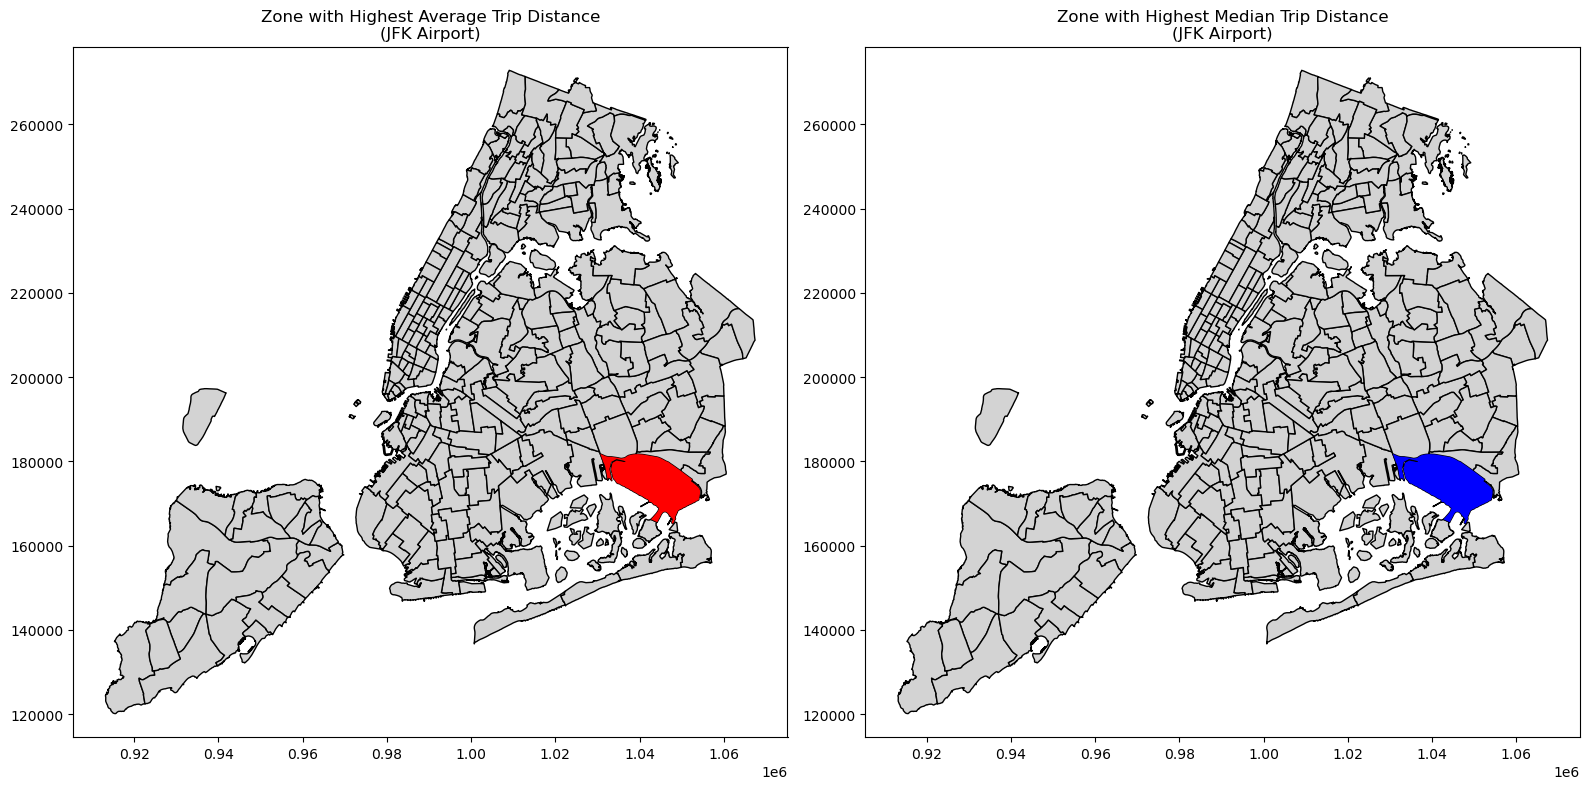

In [134]:
# Calculate the average, median, and count of trips for each PULocationID
trip_stats_by_location = df_january.groupby('PULocationID').agg(
    avg_trip_distance=('trip_distance', 'mean'),
    median_trip_distance=('trip_distance', 'median'),
    trip_count=('trip_distance', 'size')
).reset_index()

# Filter to include only zones with more than 100 entries
trip_stats_filtered = trip_stats_by_location[trip_stats_by_location['trip_count'] > 100]

# Merge with zone_lookup to get descriptive labels for each pickup location
trip_stats_with_zone = trip_stats_filtered.merge(
    zone_lookup[['LocationID', 'Zone', 'Borough']], left_on='PULocationID', right_on='LocationID', how='left'
)

# Handle missing Zone values by filling with 'Unknown Zone'
trip_stats_with_zone['Zone'] = trip_stats_with_zone['Zone'].fillna('Unknown Zone')

# Merge shapefile with filtered average and median data to highlight specific zones
zone_shp = zone_shp.merge(trip_stats_with_zone[['PULocationID', 'avg_trip_distance', 'median_trip_distance', 'Zone']], 
                          left_on='OBJECTID', right_on='PULocationID', how='left')

# Find the zones with the highest average and median trip distances
highest_avg_zone = trip_stats_with_zone.loc[trip_stats_with_zone['avg_trip_distance'].idxmax()]
highest_median_zone = trip_stats_with_zone.loc[trip_stats_with_zone['median_trip_distance'].idxmax()]

# Create a figure for the two maps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Map: Highlight the zone with the highest average trip distance
zone_shp.plot(color='lightgrey', edgecolor='black', ax=ax1)
highlight_avg_zone = zone_shp[zone_shp['OBJECTID'] == highest_avg_zone['PULocationID']]
highlight_avg_zone.plot(color='red', ax=ax1)  # Highlight zone in red
ax1.set_title(f"Zone with Highest Average Trip Distance\n({highest_avg_zone['Zone']})")
ax1.axis('equal')  # Maintain aspect ratio

# Map: Highlight the zone with the highest median trip distance
zone_shp.plot(color='lightgrey', edgecolor='black', ax=ax2)
highlight_median_zone = zone_shp[zone_shp['OBJECTID'] == highest_median_zone['PULocationID']]
highlight_median_zone.plot(color='blue', ax=ax2)  # Highlight zone in blue
ax2.set_title(f"Zone with Highest Median Trip Distance\n({highest_median_zone['Zone']})")
ax2.axis('equal')  # Maintain aspect ratio

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [135]:
print(zone_shp.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID_x  \
0         1    0.116357    0.000782           Newark Airport             1   
1         2    0.433470    0.004866              Jamaica Bay             2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens             3   
3         4    0.043567    0.000112            Alphabet City             4   
4         5    0.092146    0.000498            Arden Heights             5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID_x  trip_distance_avg  LocationID_y                   Zone_x  \
0             1.0        

In [136]:
print(zone_lookup.head())

   LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone


In [137]:
print(data.head())

  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2024-01-01 00:57:55   2024-01-01 01:17:43              1.0           1.72   
1  2024-01-01 00:03:00   2024-01-01 00:09:36              1.0           1.80   
2  2024-01-01 00:17:06   2024-01-01 00:35:01              1.0           4.70   
3  2024-01-01 00:36:38   2024-01-01 00:44:56              1.0           1.40   
4  2024-01-01 00:46:51   2024-01-01 00:52:57              1.0           0.80   

   RatecodeID  PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0         1.0           186            79             2         17.7    1.0   
1         1.0           140           236             1         10.0    3.5   
2         1.0           236            79             1         23.3    3.5   
3         1.0            79           211             1         10.0    3.5   
4         1.0           211           148             1          7.9    3.5   

   ...  pickup_month  pickup_day  pickup_wee

Correlation between total pickups and average trip distance: -0.38607530305844795


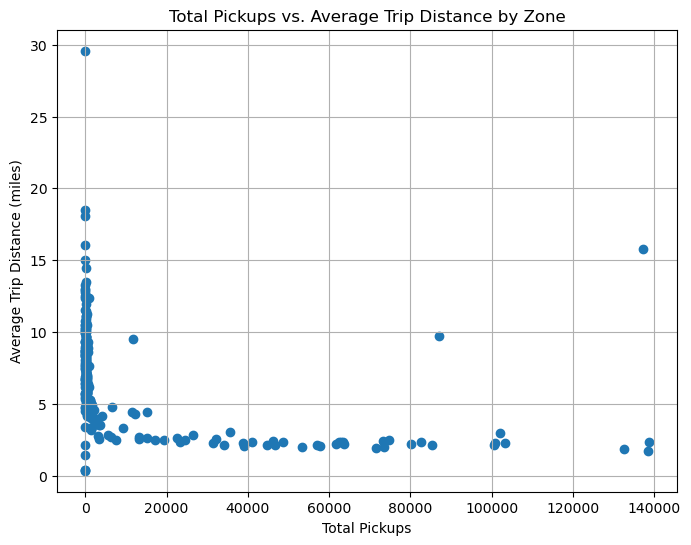

In [138]:
import pandas as pd

# Calculate total pickups per zone and average trip distance for each zone
pickup_counts = data.groupby('PULocationID').size().reset_index(name='total_pickups')
avg_trip_distance = data.groupby('PULocationID')['trip_distance'].mean().reset_index(name='avg_trip_distance')

# Merge the pickup counts and average trip distance with zone_lookup to add zone names
pickup_distance_corr = pickup_counts.merge(avg_trip_distance, on='PULocationID')
pickup_distance_corr = pickup_distance_corr.merge(zone_lookup[['LocationID', 'Zone']], left_on='PULocationID', right_on='LocationID')

# Calculate correlation
correlation_value = pickup_distance_corr['total_pickups'].corr(pickup_distance_corr['avg_trip_distance'])
print("Correlation between total pickups and average trip distance:", correlation_value)

# Plot correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(pickup_distance_corr['total_pickups'], pickup_distance_corr['avg_trip_distance'])
plt.title('Total Pickups vs. Average Trip Distance by Zone')
plt.xlabel('Total Pickups')
plt.ylabel('Average Trip Distance (miles)')
plt.grid(True)
plt.show()

Correlation between total pickups and total fare: 0.7927673109220428


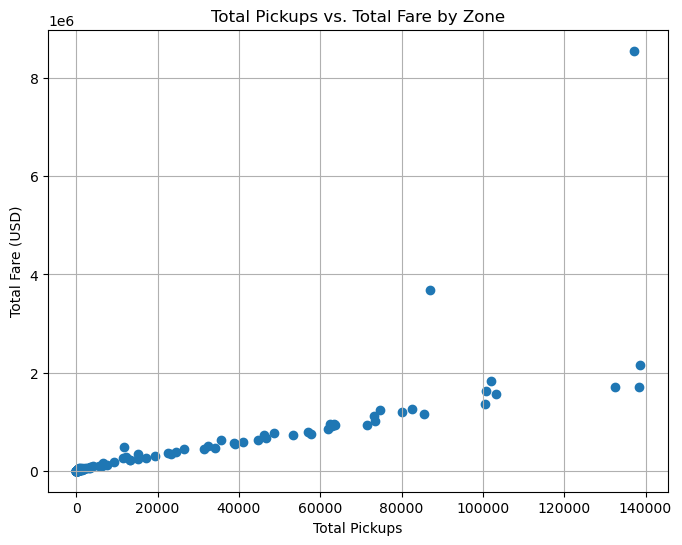

In [139]:
# Calculate total pickups and total fare for each zone
total_fare_by_zone = data.groupby('PULocationID')['fare_amount'].sum().reset_index(name='total_fare')
pickup_counts = data.groupby('PULocationID').size().reset_index(name='total_pickups')

# Merge data
pickup_fare_corr = pickup_counts.merge(total_fare_by_zone, on='PULocationID')
pickup_fare_corr = pickup_fare_corr.merge(zone_lookup[['LocationID', 'Zone']], left_on='PULocationID', right_on='LocationID')

# Calculate correlation
correlation_value = pickup_fare_corr['total_pickups'].corr(pickup_fare_corr['total_fare'])
print("Correlation between total pickups and total fare:", correlation_value)

# Plot correlation
plt.figure(figsize=(8, 6))
plt.scatter(pickup_fare_corr['total_pickups'], pickup_fare_corr['total_fare'])
plt.title('Total Pickups vs. Total Fare by Zone')
plt.xlabel('Total Pickups')
plt.ylabel('Total Fare (USD)')
plt.grid(True)
plt.show()

Correlation between trip distance and fare amount: 0.9411790834447522


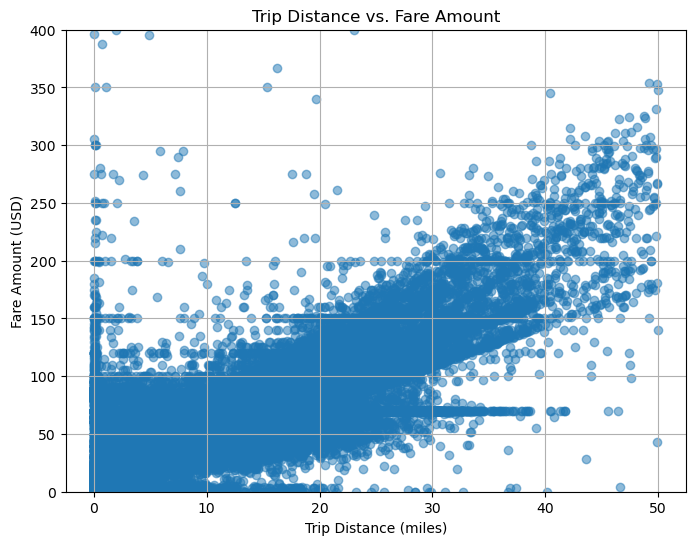

In [145]:
# Calculate correlation between trip distance and fare amount
correlation_value = data['trip_distance'].corr(data['fare_amount'])
print("Correlation between trip distance and fare amount:", correlation_value)

# Plot correlation
plt.figure(figsize=(8, 6))
plt.scatter(data['trip_distance'], data['fare_amount'], alpha=0.5)
plt.title('Trip Distance vs. Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount (USD)')
plt.ylim(0, 400)
plt.grid(True)
plt.show()

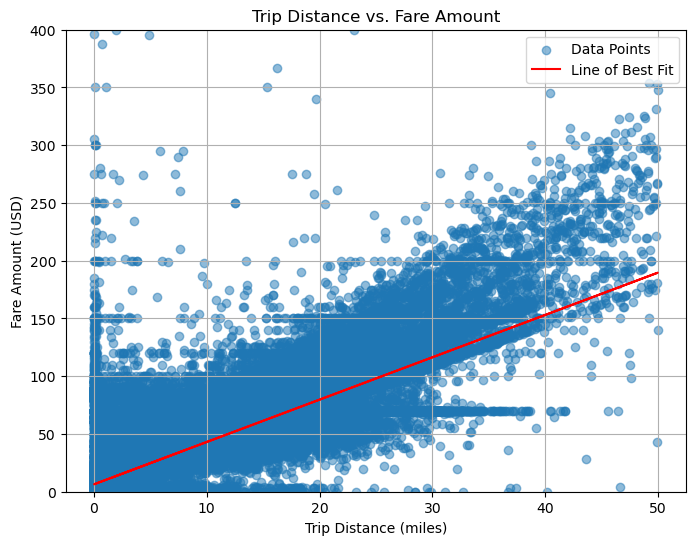

In [148]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape trip_distance data for scikit-learn
X = data['trip_distance'].values.reshape(-1, 1)
y = data['fare_amount'].values

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Generate predictions for the line of best fit
y_pred = model.predict(X)

# Plot correlation with line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(data['trip_distance'], data['fare_amount'], alpha=0.5, label='Data Points')
plt.plot(data['trip_distance'], y_pred, color='red', label='Line of Best Fit')
plt.title('Trip Distance vs. Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount (USD)')
plt.ylim(0, 400)
plt.grid(True)
plt.legend()
plt.show()

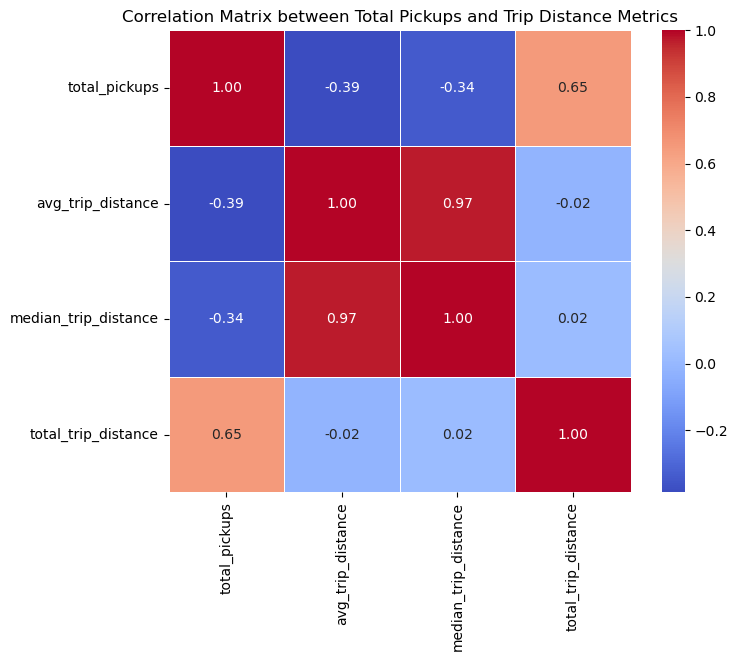

In [147]:
# Total pickups per zone
total_pickups = data.groupby('PULocationID').size().reset_index(name='total_pickups')

# Average trip distance per zone
avg_trip_distance = data.groupby('PULocationID')['trip_distance'].mean().reset_index(name='avg_trip_distance')

# Median trip distance per zone
median_trip_distance = data.groupby('PULocationID')['trip_distance'].median().reset_index(name='median_trip_distance')

# Total trip distance per zone (sum of all trip distances for that zone)
total_trip_distance = data.groupby('PULocationID')['trip_distance'].sum().reset_index(name='total_trip_distance')

# Step 2: Merge all metrics into a single DataFrame
zone_metrics = total_pickups.merge(avg_trip_distance, on='PULocationID')
zone_metrics = zone_metrics.merge(median_trip_distance, on='PULocationID')
zone_metrics = zone_metrics.merge(total_trip_distance, on='PULocationID')

# Step 3: Calculate the correlation matrix
correlation_matrix = zone_metrics[['total_pickups', 'avg_trip_distance', 'median_trip_distance', 'total_trip_distance']].corr()

# Step 4: Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Matrix between Total Pickups and Trip Distance Metrics')
plt.show()